In [ ]:
from google.colab import files
uploaded = files.upload()

Saving uch012a.jpg to uch012a.jpg


In [ ]:
!ls

sample_data  uch012a.jpg  uch084a.jpg  uch084b.jpg


In [ ]:
!pip install sparse

     |████████████████████████████████| 81kB 2.3MB/s 
     |████████████████████████████████| 3.1MB 7.8MB/s 
     |████████████████████████████████| 24.6MB 67.3MB/s 
  Found existing installation: llvmlite 0.31.0
    Uninstalling llvmlite-0.31.0:
      Successfully uninstalled llvmlite-0.31.0
  Found existing installation: numba 0.48.0
    Uninstalling numba-0.48.0:
      Successfully uninstalled numba-0.48.0


In [ ]:
!pip install ipython-autotime

In [ ]:
!pip install -U opencv-python

     |████████████████████████████████| 49.5MB 73kB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: opencv-python 4.1.2.30
    Uninstalling opencv-python-4.1.2.30:
      Successfully uninstalled opencv-python-4.1.2.30


In [ ]:
%load_ext autotime

time: 102 µs


In [ ]:
from google.colab.patches import cv2_imshow

time: 52 ms


In [ ]:
import math

def genTransform(match, keypoints1, keypoints2):
  # Calcular transformacion de semejanza (e,theta,tx,ty) a partir de un calce "match".
  # Se debe notar que los keypoints de OpenCV tienen orientacion en grados.
  e = 1
  theta = 0
  tx = 0
  ty = 0
  return (e, theta, tx, ty)

time: 2.21 ms


In [ ]:
import random

def ransac(matches, keypoints1, keypoints2):
  accepted = []

  # Por hacer:
  # Implementar RANSAC. Se debe elegir un calce al azar y calcular su transformacion de semejanza (e,theta,tx,ty)
  #  usando la funcion genTransform( ) definida arriba
  # Luego se debe evaluar el consenso de la transformacion
  # Esto se debe repetir varias veces
  # Una vez hechos todos los intentos, se debe analizar la hipotesis que tuvo el mayor consenso
  # Si dicho consenso es mayor a un umbral, se aceptan los calces del consenso como correctos
  # Los calces considerados correctos se deben guardar en "accepted"

  return accepted;

time: 2.55 ms


In [21]:
import sparse
def hough4d(matches, keypoints1, keypoints2):
  stored = []
  maxvotos = 0
  # Parametros de Hough
  dxBin = 60;
  dangBin = 30 * math.pi / 180
  umbralvotos = 4
  accepted = []

  # Por hacer:
  # Se debe recorrer todos los calces en "matches" y, para cada uno, calcular una
  # transformación usando genTransform(), y luego calcular los índices de la celda i,j,k,z
  # en la cual hay que hacer la votacion. Se recomienda usar un offset de 500 al acceder las celdas para evitar
  # evaluar la matriz con indices negativos
  # Los indices [i+500,j+500,k+500,z+500] se deben guardar en la lista "stored"

  # Este codigo permite crear una matriz sparse para almacenar los votos
  if len(stored) == 0:
    return []
  coords = np.transpose( np.array(stored) )
  data = np.ones( len(stored) )
  sm = sparse.COO(coords, data, shape=((1000,) * 4))

  # Por hacer:
  # Calcular la maxima cantidad de votos usando np.max(sm.data)
  # Si la cantidad de votos es menor que un umbral, retornar una lista vacia
  # Luego, se debe recorrer nuevamente todos los calces en "matches" y calcular indices (i,j,k,z)
  # La cantidad de votos para esa celda es: sm[i+500,j+500,k+500,z+500]
  # Las correspondencias que voten por la celda mas votada se deben agregar a accepted

  return accepted
  

time: 22.6 ms


In [ ]:
def calcAfin(matches, keypoints1, keypoints2):
  # Por hacer: calcular la transformacion afin mediante minimos cuadrados a partir de "matches"
  return np.array([[1,0,0],[0,1,0]])

time: 1.24 ms


In [ ]:
def drawProjAfin(transf, input1, input2):
  # Por hacer:
  # Dibujar un romboide que represente el rectangulo de la imagen "input2" proyectada en la imagen "input1"
  return input1


time: 1.44 ms


In [ ]:
# Esta funcion ya esta lista, no debe ser modificada
def filterMatches(matches):
  # Apply ratio test
  points1 = []
  points2 = []
  good = []

  for m,n in matches:
    if m.distance < 0.75*n.distance:  # 0.75
      good.append(m)
      points1.append(kp1[m.queryIdx].pt)
      points2.append(kp2[m.trainIdx].pt)
  return np.array(points1), np.array(points2), good

time: 4.03 ms


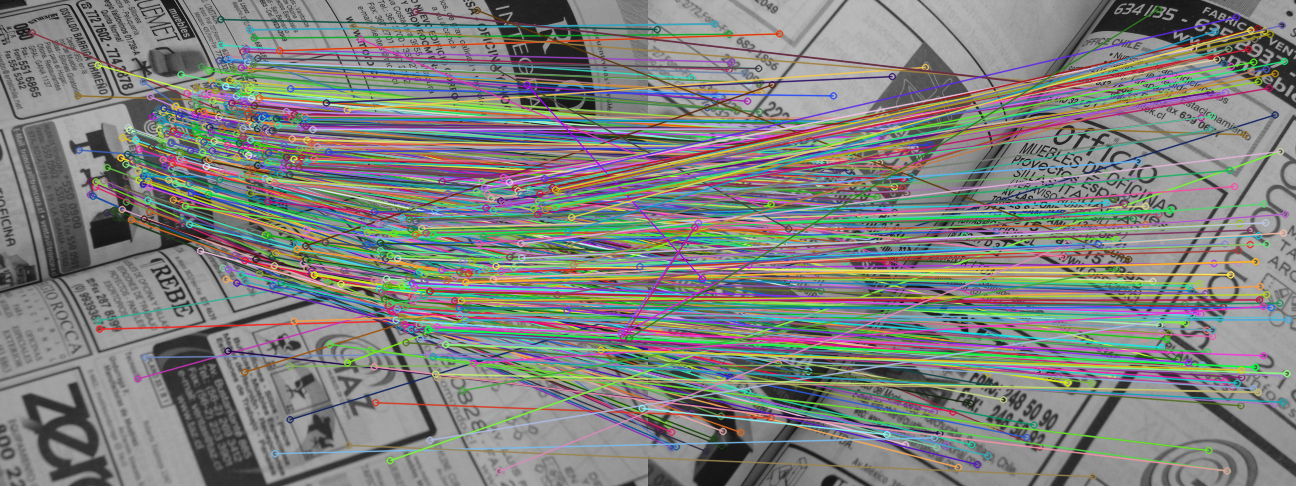

time: 1.16 s


In [22]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img2 = cv2.imread('uch084a.jpg',0)
img1 = cv2.imread('uch084b.jpg',0)

sift = cv2.SIFT_create()

kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)

bf = cv2.BFMatcher()
matches = bf.knnMatch(des1,des2, k=2)
points1, points2, good = filterMatches(matches)

img_match = cv2.drawMatches(img1,kp1,img2,kp2,good, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

cv2_imshow(img_match)


In [25]:
# Por hacer:
# 1) Obtener los calces aceptados a partir de la función ransac(good, kp2, kp1)
# 2) Dibujar los calces aceptados
# 3) Calcular la transformacion afin
# 4) Dibujar la imagen con el romboide superpuesto


time: 1.32 ms


In [27]:
# Por hacer:
# 1) Obtener los calces aceptados a partir de la función hough4d(good, kp2, kp1)
# 2) Dibujar los calces aceptados
# 3) Calcular la transformacion afin
# 4) Dibujar la imagen con el romboide superpuesto

time: 1.24 ms
